# Tarea Final Almacenamiento y Captura de Datos
## Problema 1 - Web scraping con Selenium


- ##### Patricio Ramirez
- ##### Pablo Elgueta

================================================================================================================

#### Realice un proceso de web scraping para el sitio https://jetsmart.com/cl/es/. Para ello realice las siguientes tareas:

##### 1.- Utilizar Selenium para emular un navegador y cargar la página requerida (1 punto).

##### 2.- Buscar vuelos desde Santiago a Arica del 1 de febrero al 28 de febrero utilizando los campos de inputs del buscador de la 3 página (1 punto).

##### 3.- Una vez en la página de resultados, extraiga la información de precios y fechas de vuelos de ida y de vuelta para todos los días de febrero y genere un dataframe con la información de precios y fechas (2 puntos).

##### 4.- Crear una base de datos sqlite con la información del dataframe (1 punto).

##### 5.- Realizar una consulta SQL para seleccionar los vuelos de ida y vuelta con el precio total mínimo (1 punto).

#### Librerías Requeridas para Web scraping

- !pip install -U selenium
- !pip install webdriver-manager

#### Importación de Librerías

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

import sqlite3

import pandas as pd

import time

### Ejercicio 1

#### Utilizar Selenium para emular un navegador y cargar la página requerida (1 punto).

In [2]:
# abro el navegador
driver = webdriver.Chrome((ChromeDriverManager().install()))
driver.implicitly_wait(3)

# escribo url
driver.get('https://jetsmart.com/cl/es/')
time.sleep(1)

[WDM] - Downloading: 100%|██████████| 6.58M/6.58M [00:01<00:00, 5.50MB/s]
C:\Users\pablo\AppData\Local\Temp\ipykernel_1624\1272258148.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome((ChromeDriverManager().install()))


### Ejercicio 2

#### Buscar vuelos desde Santiago a Arica del 1 de febrero al 28 de febrero utilizando los campos de inputs del buscador de la página (1 punto).

In [3]:
# Primero queremos cerrar los anuncios
#elem = driver.find_element_by_xpath("(//button[@type='button'])[2]").click()
elem = driver.find_element('xpath', "(//button[@type='button'])[2]").click()
time.sleep(1)

# Buscamos el texto de origen para hacerle click
elem = driver.find_element(By.CLASS_NAME, "dg-dummy").click()
time.sleep(1)

# Entramos al buscador y escribimos Santiago
#####elem = driver.find_element(By.CLASS_NAME, "hidden-md-up.dg-mobile-search").click() 
#####elem = driver.find_element(By.CLASS_NAME, "hidden-md-up.dg-mobile-search")
elem = driver.find_element(By.CLASS_NAME, "dg-dummy.in-focus")
elem.clear()
elem.send_keys("Santiago")
time.sleep(1)

# Buscamos el texto de origen para hacerle click
elem = driver.find_element(By.CLASS_NAME, "dg-dummy").click()
time.sleep(1)

# Entramos al buscador y escribimos Santiago
elem = driver.find_element(By.CLASS_NAME, "hidden-md-up.dg-mobile-search")

# Le haremos click al primer elemento de la lista
elem = driver.find_element(By.CLASS_NAME, "dg-typing-results-list-item").click()
time.sleep(1)


##### Nota:

Acá notamos que dependiendo de cual de los miembros del grupo abriera el programa, la aplicación desplegaba los menús de busqueda en formas diferentes, ante lo cual debiamos ejecutar el codigo con algunas pequeñas diferencias.

##### Pop-up 1:

Al seleccionar el menú de "Origen" se debía ingresar directamente el texto correspondiente a la ciudad de Origen, utilizando las líneas de código:

- elem = driver.find_element(By.CLASS_NAME, "dg-dummy").click()
- elem = driver.find_element(By.CLASS_NAME, "dg-dummy.in-focus")

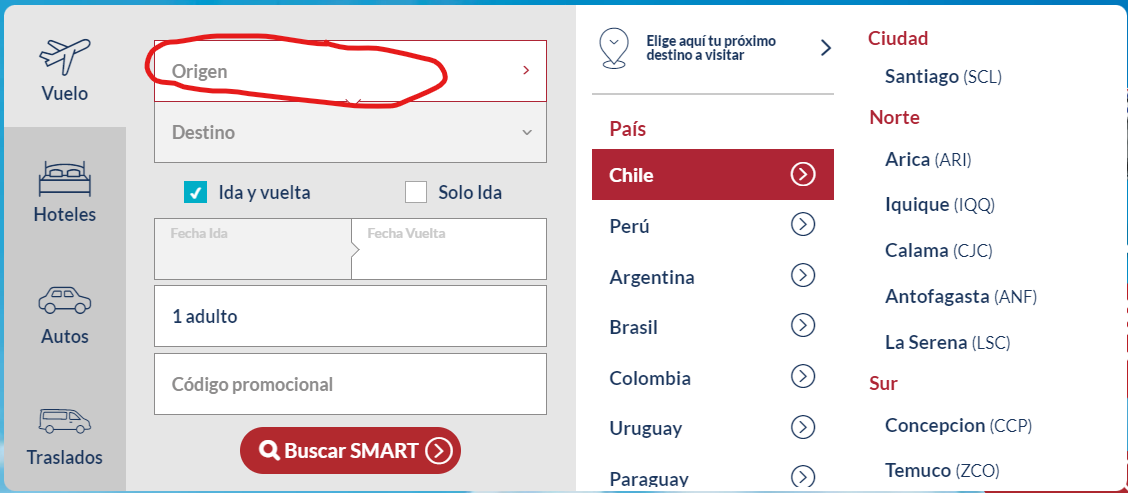

##### Pop-up 2:

Se desplegaba una barra ingreso de texto adicional para la busqueda de origen y destino, esto implicaba utilizar las siguientes líneas de código para seleccionarla e ingresar las respectivas ciudades:

- elem = driver.find_element(By.CLASS_NAME, "hidden-md-up.dg-mobile-search").click() 
- elem = driver.find_element(By.CLASS_NAME, "hidden-md-up.dg-mobile-search")

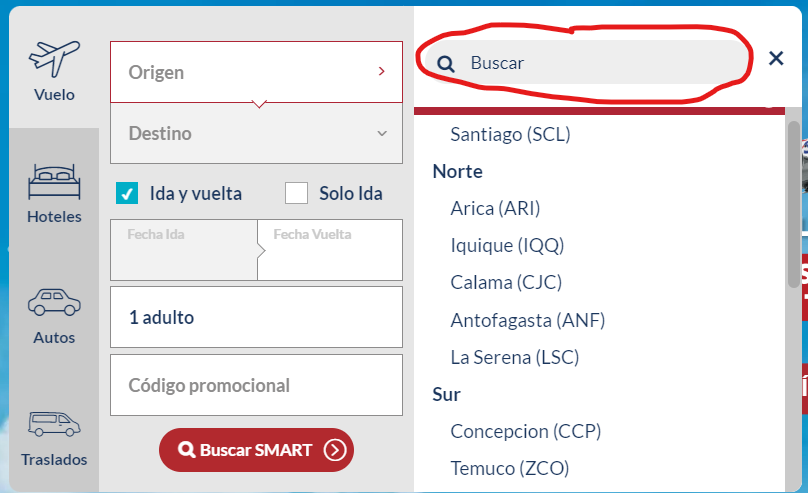

In [4]:
# Ahora haremos lo mismo pero en origen
elem = driver.find_element(By.CLASS_NAME, "dg-dummy.in-focus").click()
time.sleep(1)

# Entramos al buscador y escribimos Arica
#elem = driver.find_element(By.CLASS_NAME, "hidden-md-up.dg-mobile-search")
elem = driver.find_element(By.CLASS_NAME, "dg-dummy.in-focus")
elem.clear()
elem.send_keys("Arica")
time.sleep(1)

# Le haremos click al primer elemento de la lista
elem = driver.find_element(By.CLASS_NAME, "dg-typing-results-list-item").click()
time.sleep(1)

# Dentro de las fechas queremos escoger las de ida y de vuelta
elem = driver.find_element('xpath' , "//span[@class='flatpickr-next-month']").click()
time.sleep(1)

# Dentro de las fechas queremos escoger las de ida y de vuelta
elem = driver.find_element('xpath' , "//span[@class='flatpickr-day'][@aria-label='Febrero 1, 2023']").click()
time.sleep(1)

# Dentro de las fechas queremos escoger las de ida y de vuelta
elem = driver.find_element('xpath' , "(//span[@class='flatpickr-day'][@aria-label='Febrero 28, 2023'])[2]").click()
time.sleep(1)

# Apretamos en buscar
elem = driver.find_element('xpath' , "//*[text()='Buscar SMART']").click()
time.sleep(1)

### Ejercicio 3

#### Una vez en la página de resultados, extraiga la información de precios y fechas de vuelos de ida y de vuelta para todos los días de febrero y genere un dataframe con la información de precios y fechas (2 puntos).

In [5]:


### TERCERA PARTE PREGUNTA 1

Precios = {}

idacheck = True
dia = 1

vuelta = driver.find_element('xpath' , "//div[@data-test-id='flight-smart-fee--j|1-i|0']").text
#print(vuelta)
time.sleep(1)

for i in range(28):
    #print(f'Precios de ida para el {dia} de Febrero')
    k = 0
    
    precios_dia = []
    
    while idacheck:
        try: 
            ida = driver.find_element('xpath' ,f"//div[@data-test-id='flight-smart-fee--j|0-i|{k}']").text
            #print(ida)
            k+=1
            #print(f'el valor de k es {k}')
            precios_dia.append((ida,vuelta))
            
        except:
            idacheck = False
            break
    
    Precios[f'{dia} de Febrero'] = precios_dia
    
    elem = driver.find_element('xpath' ,"//i[@class='js-icon js-circle-chevron-right']").click()
    time.sleep(1)
    
    #print(Precios)
    
    dia += 1
    idacheck = True

#cierro el navegador    
driver.close()    

columnas = ['Dia', 'Precio_de_ida', 'Precio_de_vuelta']
dias = []
Precios_ida = []
Precios_vuelta = []

for keys in Precios:
    dias.append(keys)
    Precios_ida.append(Precios[keys][0][0])
    Precios_vuelta.append(Precios[keys][0][1])
    try:
        Precios_ida.append(Precios[keys][1][0])
        Precios_vuelta.append(Precios[keys][1][1])
        dias.append(keys)
    except:
        continue
        
df = pd.DataFrame(columns=columnas)
df['Dia'] = dias
df['Precio_de_ida'] = Precios_ida
df['Precio_de_vuelta'] = Precios_vuelta

df['Precio_de_ida'] = df['Precio_de_ida'].str.replace('.', '')
df['Precio_de_ida'] = df['Precio_de_ida'].str.replace('$', '')
df['Precio_de_ida'] = df['Precio_de_ida'].astype(int)
df['Precio_de_vuelta'] = df['Precio_de_vuelta'].str.replace('.', '')
df['Precio_de_vuelta'] = df['Precio_de_vuelta'].str.replace('$', '')
df['Precio_de_vuelta'] = df['Precio_de_vuelta'].astype(int)

total_viaje = []
for i in range(len(df)):
    total_viaje.append(df['Precio_de_vuelta'][i] + df['Precio_de_ida'][i])

df['Precio_Total'] = total_viaje
df

C:\Users\pablo\AppData\Local\Temp\ipykernel_1624\1357190171.py:64: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Precio_de_ida'] = df['Precio_de_ida'].str.replace('.', '')
C:\Users\pablo\AppData\Local\Temp\ipykernel_1624\1357190171.py:65: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Precio_de_ida'] = df['Precio_de_ida'].str.replace('$', '')
C:\Users\pablo\AppData\Local\Temp\ipykernel_1624\1357190171.py:67: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Precio_de_vuelta'] = df['Precio_de_vuelta'].str.replace('

,Dia,Precio_de_ida,Precio_de_vuelta,Precio_Total
0,1 de Febrero,143900,51900,195800
1,2 de Febrero,105900,51900,157800
2,3 de Febrero,90900,51900,142800
3,4 de Febrero,105900,51900,157800
4,5 de Febrero,79900,51900,131800
5,5 de Febrero,105900,51900,157800
6,6 de Febrero,90900,51900,142800
7,7 de Febrero,79900,51900,131800
8,8 de Febrero,90900,51900,142800
9,9 de Febrero,79900,51900,131800


### Ejercicio 4

##### Crear una base de datos sqlite con la información del dataframe (1 punto).

In [6]:
### CUARTA PARTE PREGUNTA 1

conexion_sql = sqlite3.connect(':memory:')
df.to_sql(name='Viajes', con=conexion_sql)

32

### Ejercicio 5

##### Realizar una consulta SQL para seleccionar los vuelos de ida y vuelta con el precio total mínimo (1 punto).

In [7]:
### QUINTA PARTE PREGUNTA 1

request = pd.read_sql('SELECT * FROM Viajes ORDER BY Precio_total ASC' , conexion_sql)
request

,index,Dia,Precio_de_ida,Precio_de_vuelta,Precio_Total
0,25,23 de Febrero,43900,51900,95800
1,27,25 de Febrero,43900,51900,95800
2,23,21 de Febrero,47900,51900,99800
3,15,14 de Febrero,51900,51900,103800
4,26,24 de Febrero,51900,51900,103800
5,31,28 de Febrero,51900,51900,103800
6,17,16 de Febrero,57900,51900,109800
7,19,18 de Febrero,57900,51900,109800
8,24,22 de Febrero,57900,51900,109800
9,30,27 de Febrero,57900,51900,109800
